In [1]:
#Part 1: locate arterial slow zones
#import the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('~/Downloads/dot_VZV_Arterial_Slow_Zones_20230614.csv')
df.head()

,the_geom,FROM_STREE,TO_STREET,ENFORCEMEN,Shape_Leng
0,MULTILINESTRING ((-73.89867564098704 40.675582...,Columbia St,76 St,05/19/2014 12:00:00 AM,"80,344.0343615"
1,MULTILINESTRING ((-73.92988099693609 40.813040...,E 140th St,Mosholu Parkway,05/19/2014 12:00:00 AM,"76,627.8881458"
2,MULTILINESTRING ((-73.93474259188893 40.750979...,40 Rd,114 St,06/02/2014 12:00:00 AM,"22,288.0890248"
3,MULTILINESTRING ((-73.94499614744701 40.720773...,Freeman St,Bayard St,06/02/2014 12:00:00 AM,"11,108.5422433"
4,MULTILINESTRING ((-73.881244225275 40.88270963...,Jerome Ave,NE Thrwy SB,06/09/2014 12:00:00 AM,"15,702.2297811"


In [14]:
import re

def process_coordinates(value):
    pattern = r'-?\d+\.\d+\s-?\d+\.\d+'

    # Find all occurrences of coordinates in the multistring
    coordinates = re.findall(pattern, value)

    # Initialize empty lists for longitude and latitude
    longitudes = []
    latitudes = []

    # Process the coordinates and store them in the lists
    for coord in coordinates:
        longitude, latitude = map(float, coord.split())
        longitude = "{:.3f}".format(longitude)
        latitude = "{:.3f}".format(latitude)
        longitudes.append(longitude)
        latitudes.append(latitude)

    arterial_slow_zone_coordinates = list(zip(longitudes, latitudes))

    # Convert the list to a set to eliminate duplicates, then back to a list
    arterial_slow_zone_coordinates = list(set(arterial_slow_zone_coordinates))

    return arterial_slow_zone_coordinates

df['processed_geom'] = df['the_geom'].apply(process_coordinates)
df.head()

,the_geom,FROM_STREE,TO_STREET,ENFORCEMEN,Shape_Leng,processed_geom
0,MULTILINESTRING ((-73.89867564098704 40.675582...,Columbia St,76 St,05/19/2014 12:00:00 AM,"80,344.0343615","[(-73.960, 40.680), (-73.946, 40.678), (-73.99..."
1,MULTILINESTRING ((-73.92988099693609 40.813040...,E 140th St,Mosholu Parkway,05/19/2014 12:00:00 AM,"76,627.8881458","[(-73.927, 40.820), (-73.923, 40.825), (-73.93..."
2,MULTILINESTRING ((-73.93474259188893 40.750979...,40 Rd,114 St,06/02/2014 12:00:00 AM,"22,288.0890248","[(-73.913, 40.753), (-73.907, 40.753), (-73.90..."
3,MULTILINESTRING ((-73.94499614744701 40.720773...,Freeman St,Bayard St,06/02/2014 12:00:00 AM,"11,108.5422433","[(-73.948, 40.723), (-73.949, 40.725), (-73.94..."
4,MULTILINESTRING ((-73.881244225275 40.88270963...,Jerome Ave,NE Thrwy SB,06/09/2014 12:00:00 AM,"15,702.2297811","[(-73.879, 40.881), (-73.876, 40.880), (-73.85..."


In [17]:
# Flatten the list of lists in 'processed_geom' column
flat_list = [item for sublist in df['processed_geom'].tolist() for item in sublist]

# Convert the list to a set to eliminate duplicates, then back to a list
unique_arterial_slow_zones_coordinates = list(set(flat_list))

In [ ]:
# part 2: locate collisions and filter out collisions in arterial slow zones

In [23]:
collision = pd.read_csv("~/Downloads/processed_data.csv")
collision

/var/folders/yk/kscn_56x375fmsh66kn5nx2r0000gn/T/ipykernel_78263/50190964.py:1: DtypeWarning: Columns (3,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  collision = pd.read_csv("~/Downloads/processed_data.csv")


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,avg_temperature,min_temperature,max_temperature,precipitation_amount,snowfall_amount,wind_direction,wind_speed,Peak_gust_wind_speed,atmospheric_pressure,sunshine_duration
0,2022-03-26,11:45,NEW YORK COUNTY,10044.0,40.756929,-73.954755,"(40.75692900000001, -73.9547551)",QUEENSBORO BRIDGE UPPER,NaN,NaN,...,9.6,7.0,12.0,1.8,0.0,262.0,16.6,NaN,999.0,NaN
1,2022-06-29,6:55,QUEENS COUNTY,10465.0,40.799932,-73.793548,"(40.7999319, -73.7935481)",THROGS NECK BRIDGE,NaN,NaN,...,23.0,17.0,28.3,0.6,0.0,229.0,9.0,NaN,1022.8,NaN
2,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,22.1,17.8,26.7,0.2,0.0,252.0,11.7,NaN,1021.1,NaN
3,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,5.8,3.0,10.3,0.0,0.0,340.0,12.4,NaN,1032.0,NaN
4,2021-04-14,12:47,NaN,NaN,40.863450,-73.910885,"(40.8634495, -73.910885)",MAJOR DEEGAN EXPRESSWAY RAMP,NaN,NaN,...,13.6,8.3,20.6,0.2,0.0,261.0,8.1,NaN,1016.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857913,2023-05-22,14:57,BRONX,10468.0,40.862442,-73.897150,"(40.862442, -73.89715)",EAST FORDHAM ROAD,GRAND CONCOURSE,NaN,...,18.1,14.4,23.0,0.0,0.0,55.0,11.0,NaN,1022.0,NaN
1857914,2023-05-19,20:48,BROOKLYN,11223.0,40.590110,-73.974220,"(40.59011, -73.97422)",AVENUE X,SHELL ROAD,NaN,...,15.6,12.2,19.4,0.0,0.0,167.0,12.9,NaN,1026.9,NaN
1857915,2023-03-10,18:24,BRONX,10456.0,40.820360,-73.910200,"(40.82036, -73.9102)",NaN,NaN,780 SAINT ANNS AVENUE,...,5.3,3.3,7.2,6.4,0.0,71.0,11.1,NaN,1014.6,NaN
1857916,2023-05-10,22:54,NaN,NaN,40.692404,-74.011993,"(40.6924041, -74.0119927)",BROOKLYN BATTERY TUNNEL,NaN,NaN,...,16.4,11.7,22.2,0.0,0.0,242.0,8.0,NaN,1020.5,NaN


In [5]:
collision_df = pd.DataFrame(collision)
useful_variables = ['CRASH DATE','LATITUDE','LONGITUDE','NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED']
# Split the "Longitude" and "Latitude" columns into a new DataFrame
collision_df = collision_df[useful_variables].copy()
collision_df['LONGITUDE'] = collision_df['LONGITUDE'].round(3)
collision_df['LATITUDE'] = collision_df['LATITUDE'].round(3)
collision_df

,CRASH DATE,LATITUDE,LONGITUDE,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED
0,2022-03-26,40.757,-73.955,0,0
1,2022-06-29,40.800,-73.794,0,0
2,2021-09-11,40.667,-73.866,0,0
3,2021-12-14,40.683,-73.917,0,0
4,2021-04-14,40.863,-73.911,0,0
...,...,...,...,...,...
1857913,2023-05-22,40.862,-73.897,0,0
1857914,2023-05-19,40.590,-73.974,1,0
1857915,2023-03-10,40.820,-73.910,1,0
1857916,2023-05-10,40.692,-74.012,0,0


In [6]:
coordinates = list(zip(collision_df['LONGITUDE'],collision_df['LATITUDE']))
collision_df['coordinates']=coordinates
collision_df.head()

,CRASH DATE,LATITUDE,LONGITUDE,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,coordinates
0,2022-03-26,40.757,-73.955,0,0,"(-73.955, 40.757)"
1,2022-06-29,40.800,-73.794,0,0,"(-73.794, 40.8)"
2,2021-09-11,40.667,-73.866,0,0,"(-73.866, 40.667)"
3,2021-12-14,40.683,-73.917,0,0,"(-73.917, 40.683)"
4,2021-04-14,40.863,-73.911,0,0,"(-73.911, 40.863)"


In [21]:
# Assuming collision_df is your DataFrame and arterial_slow_zone_coordinates is your list

# Convert items in arterial_slow_zone_coordinates to tuples with float values
unique_arterial_slow_zones_coordinates = [(float(x), float(y)) for x, y in unique_arterial_slow_zones_coordinates]

# Convert collision_df['coordinates'] to tuples with float values
collision_df['coordinates'] = collision_df.apply(lambda row: (float(row['LONGITUDE']), float(row['LATITUDE'])), axis=1)

# Filter rows in DataFrame
filtered_df = collision_df[collision_df['coordinates'].isin(unique_arterial_slow_zones_coordinates)]

In [37]:
arterial_slow_zones_collision = pd.DataFrame(filtered_df)
arterial_slow_zones_collision

,CRASH DATE,LATITUDE,LONGITUDE,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,coordinates
14,2021-12-14,40.651,-73.959,0,0,"(-73.959, 40.651)"
21,2021-12-13,40.632,-74.088,0,0,"(-74.088, 40.632)"
28,2021-12-14,40.785,-73.954,0,0,"(-73.954, 40.785)"
48,2022-04-24,40.680,-73.975,0,0,"(-73.975, 40.68)"
51,2022-04-24,40.673,-73.911,0,0,"(-73.911, 40.673)"
...,...,...,...,...,...,...
1857898,2023-05-22,40.680,-73.877,0,0,"(-73.877, 40.68)"
1857904,2023-05-22,40.678,-73.952,0,0,"(-73.952, 40.678)"
1857909,2023-05-22,40.871,-73.894,0,0,"(-73.894, 40.871)"
1857910,2023-05-22,40.721,-73.984,1,0,"(-73.984, 40.721)"


In [ ]:
# Part 3: calculate numbers of arterial slow zones

In [38]:
import pandas as pd

# First, convert the 'CRASH DATE' column to datetime
arterial_slow_zones_collision['CRASH DATE'] = pd.to_datetime(arterial_slow_zones_collision['CRASH DATE'])

# Set 'CRASH DATE' as the DataFrame's index
arterial_slow_zones_collision.set_index('CRASH DATE', inplace=True)

# Resample the DataFrame by month and compute sums for 'NUMBER OF PEDESTRIANS INJURED' and 'NUMBER OF PEDESTRIANS KILLED'
monthly_summary_arterial = arterial_slow_zones_collision.resample('M').agg({'NUMBER OF PEDESTRIANS INJURED': 'sum', 'NUMBER OF PEDESTRIANS KILLED': 'sum'})

# Compute the count of rows for each month (i.e., the number of collisions)
monthly_summary_arterial['NUMBER OF COLLISIONS'] = arterial_slow_zones_collision.resample('M').size()

# Reset index to make 'CRASH DATE' a column again
monthly_summary_arterial.reset_index(inplace=True)

In [39]:
monthly_summary_arterial

,CRASH DATE,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF COLLISIONS
0,2012-07-31,160,2,2479
1,2012-08-31,143,1,2369
2,2012-09-30,135,6,2411
3,2012-10-31,146,1,2407
4,2012-11-30,168,2,2233
...,...,...,...,...
127,2023-02-28,101,1,862
128,2023-03-31,103,2,976
129,2023-04-30,91,1,957
130,2023-05-31,116,0,985


In [44]:
# First, convert the 'CRASH DATE' column to datetime
collision_df['CRASH DATE'] = pd.to_datetime(collision_df['CRASH DATE'])

# Set 'CRASH DATE' as the DataFrame's index
collision_df.set_index('CRASH DATE', inplace=True)

# Resample the DataFrame by month and compute sums for 'NUMBER OF PEDESTRIANS INJURED' and 'NUMBER OF PEDESTRIANS KILLED'
monthly_summary_total = collision_df.resample('M').agg({'NUMBER OF PEDESTRIANS INJURED': 'sum', 'NUMBER OF PEDESTRIANS KILLED': 'sum'})

# Compute the count of rows for each month (i.e., the number of collisions)
monthly_summary_total['NUMBER OF COLLISIONS'] = collision_df.resample('M').size()

# Reset index to make 'CRASH DATE' a column again
monthly_summary_total.reset_index(inplace=True)

In [45]:
monthly_summary_total

,CRASH DATE,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF COLLISIONS
0,2012-07-31,777,6,15453
1,2012-08-31,794,13,15619
2,2012-09-30,838,12,15037
3,2012-10-31,902,12,15286
4,2012-11-30,949,8,14382
...,...,...,...,...
127,2023-02-28,610,7,6661
128,2023-03-31,758,8,7839
129,2023-04-30,600,10,7409
130,2023-05-31,727,4,8180


In [128]:
arterial_to_nyc = monthly_summary_total.copy()
arterial_to_nyc.columns = ['crash_date','number_injured','number_fatality','number_collisions']
arterial_to_nyc['number_injured'] = monthly_summary_arterial['NUMBER OF PEDESTRIANS INJURED']/ \
                                    monthly_summary_total['NUMBER OF PEDESTRIANS INJURED']
arterial_to_nyc['number_fatality'] = monthly_summary_arterial['NUMBER OF PEDESTRIANS KILLED']/ \
                                    monthly_summary_total['NUMBER OF PEDESTRIANS KILLED']
arterial_to_nyc['number_collisions'] = monthly_summary_arterial['NUMBER OF COLLISIONS']/ \
                                        monthly_summary_total['NUMBER OF COLLISIONS']
arterial_to_nyc = arterial_to_nyc.drop([131])

In [129]:
arterial_to_nyc

,crash_date,number_injured,number_fatality,number_collisions
0,2012-07-31,0.205920,0.333333,0.160422
1,2012-08-31,0.180101,0.076923,0.151674
2,2012-09-30,0.161098,0.500000,0.160338
3,2012-10-31,0.161863,0.083333,0.157464
4,2012-11-30,0.177028,0.250000,0.155264
...,...,...,...,...
126,2023-01-31,0.152096,0.200000,0.126540
127,2023-02-28,0.165574,0.142857,0.129410
128,2023-03-31,0.135884,0.250000,0.124506
129,2023-04-30,0.151667,0.100000,0.129167


In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'arterial_to_nyc' is your DataFrame
# Convert the 'crash_date' column to datetime type (if it's not already in datetime format)
arterial_to_nyc['crash_date'] = pd.to_datetime(arterial_to_nyc['crash_date'])

# Set the 'crash_date' column as the index
arterial_to_nyc.set_index('crash_date', inplace=True)


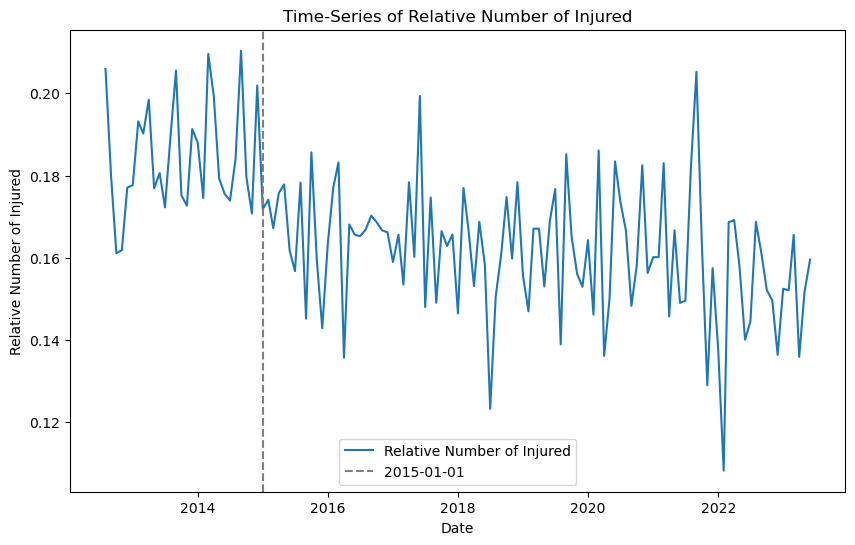

In [133]:
# Plotting the time-series graph for 'number_injured'
plt.figure(figsize=(10, 6))
plt.plot(arterial_to_nyc.index, arterial_to_nyc['number_injured'], label='Relative Number of Injured')
plt.xlabel('Date')
plt.ylabel('Relative Number of Injured')
plt.title('Time-Series of Relative Number of Injured')
plt.axvline(pd.to_datetime('2015-01-01'), color='gray', linestyle='--', label='2015-01-01')
plt.legend()
plt.show()

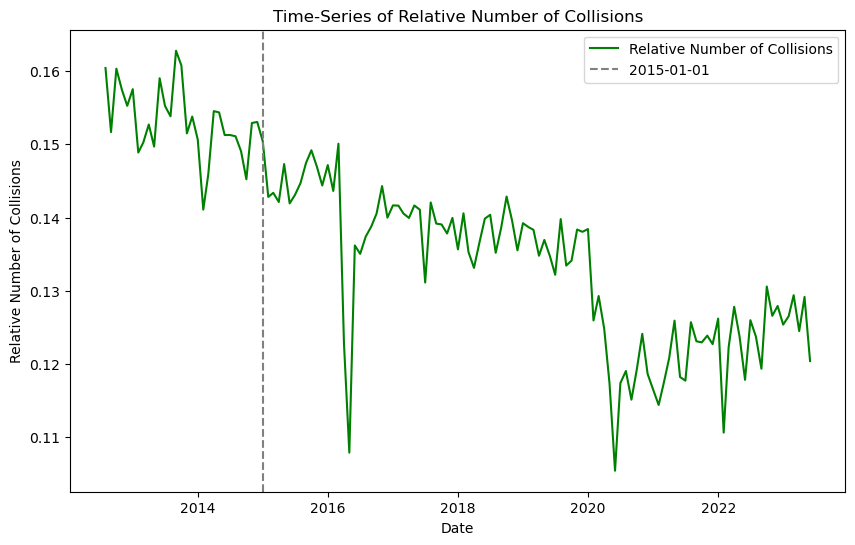

In [134]:
# Plotting the time-series graph for 'number_collisions'
plt.figure(figsize=(10, 6))
plt.plot(arterial_to_nyc.index, arterial_to_nyc['number_collisions'], label='Relative Number of Collisions', color='green')
plt.axvline(pd.to_datetime('2015-01-01'), color='gray', linestyle='--', label='2015-01-01')
plt.xlabel('Date')
plt.ylabel('Relative Number of Collisions')
plt.title('Time-Series of Relative Number of Collisions')
plt.legend()
plt.show()

In [89]:
# for fatality, using one year as a unite is more readable
# Resample the DataFrame by month and compute sums for 'NUMBER OF PEDESTRIANS INJURED' and 'NUMBER OF PEDESTRIANS KILLED'
annual_summary_total = collision_df.resample('Y').agg({'NUMBER OF PEDESTRIANS INJURED': 'sum', 'NUMBER OF PEDESTRIANS KILLED': 'sum'})

# Compute the count of rows for each month (i.e., the number of collisions)
annual_summary_total['NUMBER OF COLLISIONS'] = collision_df.resample('Y').size()

# Reset index to make 'CRASH DATE' a column again
annual_summary_total.reset_index(inplace=True)
annual_summary_total = annual_summary_total.drop([11])
annual_summary_total

,CRASH DATE,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF COLLISIONS
0,2012-12-31,5470,68,91373
1,2013-12-31,11017,150,183971
2,2014-12-31,10086,121,184970
3,2015-12-31,9168,117,194592
4,2016-12-31,9785,132,204611
5,2017-12-31,10842,119,221800
6,2018-12-31,10849,117,221875
7,2019-12-31,10287,125,203044
8,2020-12-31,6496,95,108725
9,2021-12-31,7200,121,106183


In [90]:
# Resample the DataFrame by month and compute sums for 'NUMBER OF PEDESTRIANS INJURED' and 'NUMBER OF PEDESTRIANS KILLED'
annual_summary_arterial = arterial_slow_zones_collision.resample('Y').agg({'NUMBER OF PEDESTRIANS INJURED': 'sum', 'NUMBER OF PEDESTRIANS KILLED': 'sum'})

# Compute the count of rows for each month (i.e., the number of collisions)
annual_summary_arterial['NUMBER OF COLLISIONS'] = arterial_slow_zones_collision.resample('Y').size()

# Reset index to make 'CRASH DATE' a column again
annual_summary_arterial.reset_index(inplace=True)
annual_summary_arterial = annual_summary_arterial.drop([11])
annual_summary_arterial

,CRASH DATE,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF COLLISIONS
0,2012-12-31,967,16,14356
1,2013-12-31,2050,38,28370
2,2014-12-31,1865,26,27753
3,2015-12-31,1512,13,28236
4,2016-12-31,1630,16,28211
5,2017-12-31,1784,29,30837
6,2018-12-31,1750,19,30650
7,2019-12-31,1662,22,27701
8,2020-12-31,1055,20,13124
9,2021-12-31,1142,28,12925


In [93]:
annual_arterial_to_nyc = annual_summary_total.copy()
annual_arterial_to_nyc.columns = ['crash_date','number_injured','number_fatality','number_collisions']
annual_arterial_to_nyc['number_injured'] = annual_summary_arterial['NUMBER OF PEDESTRIANS INJURED']/ \
                                    annual_summary_total['NUMBER OF PEDESTRIANS INJURED']
annual_arterial_to_nyc['number_fatality'] = annual_summary_arterial['NUMBER OF PEDESTRIANS KILLED']/ \
                                    annual_summary_total['NUMBER OF PEDESTRIANS KILLED']
annual_arterial_to_nyc['number_collisions'] = annual_summary_arterial['NUMBER OF COLLISIONS']/ \
                                        annual_summary_total['NUMBER OF COLLISIONS']
annual_arterial_to_nyc

,crash_date,number_injured,number_fatality,number_collisions
0,2012-12-31,0.176782,0.235294,0.157114
1,2013-12-31,0.186076,0.253333,0.154209
2,2014-12-31,0.184910,0.214876,0.150041
3,2015-12-31,0.164921,0.111111,0.145104
4,2016-12-31,0.166582,0.121212,0.137876
5,2017-12-31,0.164545,0.243697,0.139031
6,2018-12-31,0.161305,0.162393,0.138141
7,2019-12-31,0.161563,0.176000,0.136429
8,2020-12-31,0.162408,0.210526,0.120708
9,2021-12-31,0.158611,0.231405,0.121724


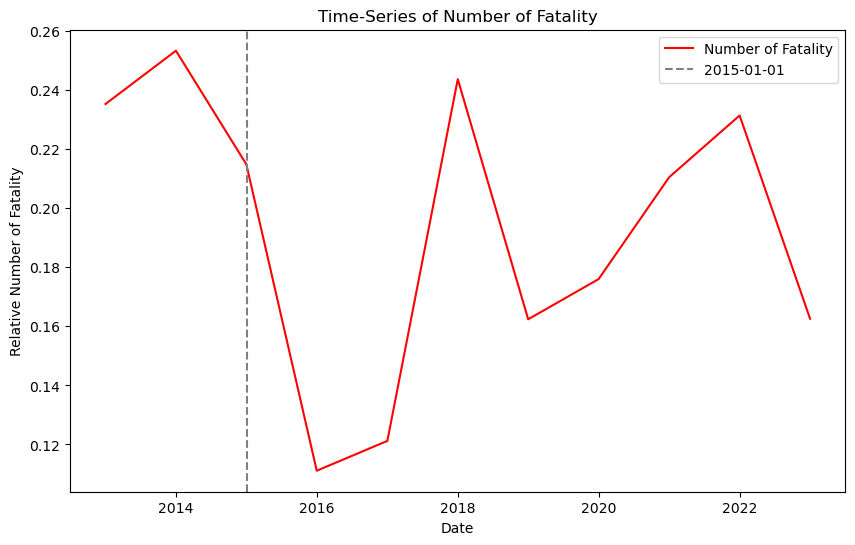

In [121]:
plt.figure(figsize=(10, 6))
plt.plot(annual_arterial_to_nyc['crash_date'], annual_arterial_to_nyc['number_fatality'], label='Number of Fatality', color='red')
plt.axvline(pd.to_datetime('2015-01-01'), color='gray', linestyle='--', label='2015-01-01')
plt.xlabel('Date')
plt.ylabel('Relative Number of Fatality')
plt.title('Time-Series of Number of Fatality')
plt.legend()
plt.show()

In [115]:
arterial_odds = annual_summary_arterial.copy()
arterial_odds

,CRASH DATE,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF COLLISIONS
0,2012-12-31,967,16,14356
1,2013-12-31,2050,38,28370
2,2014-12-31,1865,26,27753
3,2015-12-31,1512,13,28236
4,2016-12-31,1630,16,28211
5,2017-12-31,1784,29,30837
6,2018-12-31,1750,19,30650
7,2019-12-31,1662,22,27701
8,2020-12-31,1055,20,13124
9,2021-12-31,1142,28,12925


In [135]:
arterial_odds['odds'] = arterial_odds['NUMBER OF PEDESTRIANS KILLED']/(arterial_odds['NUMBER OF PEDESTRIANS INJURED']-arterial_odds['NUMBER OF PEDESTRIANS KILLED'])
arterial_odds

,CRASH DATE,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF COLLISIONS,odds
0,2012-12-31,967,16,14356,0.016824
1,2013-12-31,2050,38,28370,0.018887
2,2014-12-31,1865,26,27753,0.014138
3,2015-12-31,1512,13,28236,0.008672
4,2016-12-31,1630,16,28211,0.009913
5,2017-12-31,1784,29,30837,0.016524
6,2018-12-31,1750,19,30650,0.010976
7,2019-12-31,1662,22,27701,0.013415
8,2020-12-31,1055,20,13124,0.019324
9,2021-12-31,1142,28,12925,0.025135


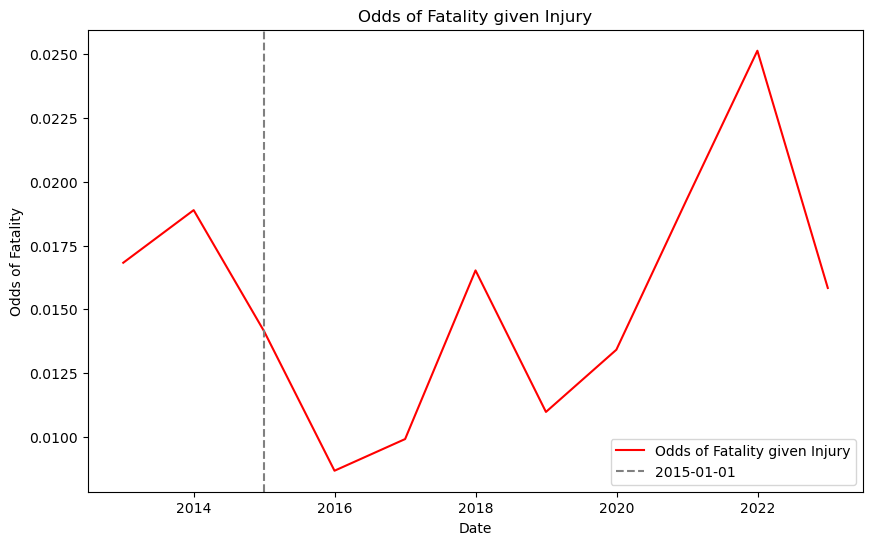

In [136]:
plt.figure(figsize=(10, 6))
plt.plot(arterial_odds['CRASH DATE'], arterial_odds['odds'], label='Odds of Fatality given Injury', color='red')
plt.axvline(pd.to_datetime('2015-01-01'), color='gray', linestyle='--', label='2015-01-01')
plt.xlabel('Date')
plt.ylabel('Odds of Fatality')
plt.title('Odds of Fatality given Injury')
plt.legend()
plt.show()